In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from pathlib import Path


import cartopy.crs as ccrs
import cartopy

from satpy import Scene
from glob import glob
from pansat.products.satellite.gpm import l2b_gpm_cmb
from pansat.products.satellite.goes import goes_16_l1b_radiances_all_full_disk #goes_16_l1b_radiances_rgb_full_disk

In [2]:
t_0 = datetime(2017,12,30,18,17,34)
t_1 = datetime(2017,12,30,19,50,9)

In [3]:
files = l2b_gpm_cmb.download(t_0, t_1, '../dataset/temp/')

Please enter your pansat user password:
········


In [4]:
dataset = l2b_gpm_cmb.open(files[0])
lats = dataset["latitude"]
lons = dataset["longitude"]
precip = dataset["surface_precipitation"]

In [5]:
dataset

<xarray.Dataset>
Dimensions:                (matched_pixels: 49, matched_scans: 7937, scans: 7937)
Coordinates:
  * matched_scans          (matched_scans) int64 0 1 2 3 ... 7933 7934 7935 7936
  * matched_pixels         (matched_pixels) int64 0 1 2 3 4 5 ... 44 45 46 47 48
  * scans                  (scans) int64 0 1 2 3 4 ... 7932 7933 7934 7935 7936
    latitude               (matched_scans, matched_pixels) float32 -63.98 ......
    longitude              (matched_scans, matched_pixels) float32 -132.4 ......
Data variables:
    surface_precipitation  (matched_scans, matched_pixels) float32 0.0 ... 0.0
    scan_time              (scans) datetime64[ns] 2017-12-30T18:17:35.735000 ...

In [6]:
lats.values[((lons <5.0)*(lons>-20.0)).any(axis=1)]

array([[48.29888 , 48.269535, 48.240154, ..., 46.973072, 46.940914,
        46.908638],
       [48.334763, 48.305393, 48.27599 , ..., 47.008   , 46.97582 ,
        46.943523],
       [48.37066 , 48.341267, 48.31184 , ..., 47.04292 , 47.01072 ,
        46.9784  ],
       ...,
       [62.650795, 62.607105, 62.56342 , ..., 60.72635 , 60.680885,
        60.63531 ],
       [62.672516, 62.62879 , 62.585068, ..., 60.746635, 60.701145,
        60.65554 ],
       [62.694157, 62.6504  , 62.606644, ..., 60.76688 , 60.72136 ,
        60.675728]], dtype=float32)

In [7]:
import sys
sys.path.append('../visualize')
import plotTestSetup as setup

In [8]:
from pyresample import geometry, load_area
import yaml
from matplotlib.patches import Rectangle

areas_filepath = '../dataset/downloads/files/areas.yaml'
area_def_fulldisk = load_area(areas_filepath, 'full_disk')
area_def_region = load_area(areas_filepath, 'region')

area_file = open(areas_filepath)
parsed_area_file = yaml.load(area_file, Loader=yaml.FullLoader)
area_dict_region = parsed_area_file['region']
area_file.close()
region_corners = area_dict_region['area_extent']

crs2 = area_def_fulldisk.to_cartopy_crs()

/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [9]:
cmap = get_cmap("magma")
cmap.set_bad("lightgrey")
norm = LogNorm(1e-2, 1e2)


<ipython-input-9-15726dd583d4>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cmap.set_bad("lightgrey")


/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.5, 1.0, 'Plate carrée projection')

/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')
/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


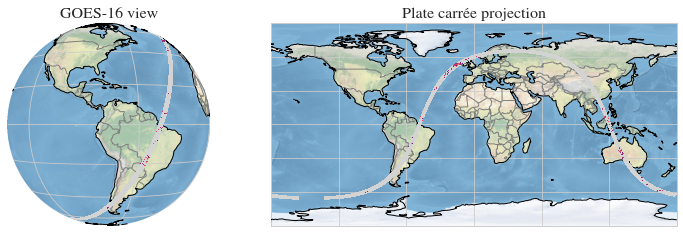

In [10]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,2])

proj = crs2 #ccrs.NearsidePerspective(central_latitude=0.0, central_longitude=-75.0)
ax1 = fig.add_subplot(gs[0], projection=proj)
ax1.stock_img()
ax1.gridlines()
ax1.coastlines(zorder=5)
ax1.add_feature(cartopy.feature.BORDERS, color='gray', zorder=5)
ax1.pcolormesh(lons, lats, precip, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=10) 
ax1.axis("off")
ax1.set_title("GOES-16 view", horizontalalignment = 'center')

proj = ccrs.PlateCarree(central_longitude=0)
ax2 = fig.add_subplot(gs[1],projection=proj)
ax2.stock_img()
ax2.gridlines()
ax2.coastlines(zorder=5)
ax2.add_feature(cartopy.feature.BORDERS, color='gray', zorder=5)
s = 0#250
e = -256
m = ax2.pcolormesh(lons[s:e], lats[s:e], precip[s:e], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=10)
 
s = -234
e = -1
ax2.pcolormesh(lons[s:e], lats[s:e], precip[s:e], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), zorder=10)
ax2.set_title("Plate carrée projection", horizontalalignment = 'center')
    
    

#fig.subplots_adjust(wspace=0.08)
#fig.colorbar(m, ax=ax2, fraction=0.024, pad=0.021).set_label(label="Precipitation rate (mm/h)", size=18)
#plt.savefig('../plots/thesis/gpm_cartopy.png', bbox_inches='tight')

Text(0.5, 1.0, 'Plate carrée projection')

/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')
/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


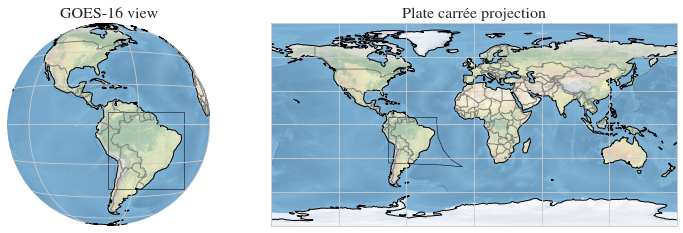

In [11]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,2])

crs2 = area_def_fulldisk.to_cartopy_crs()
ax1 = fig.add_subplot(gs[0], projection=crs2)
ax1.gridlines()
ax1.coastlines()
ax1.stock_img()
ax1.add_feature(cartopy.feature.BORDERS, color='gray', zorder=5)
rect = Rectangle((region_corners[0], region_corners[1]), region_corners[2]-region_corners[0], 
                 region_corners[3]-region_corners[1],
    linewidth=0.5, edgecolor='black', facecolor='none',  transform=crs2)
ax1.add_patch(rect)
ax1.axis("off")
ax1.set_title("GOES-16 view", horizontalalignment = 'center')

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.gridlines()
ax2.coastlines()
ax2.stock_img()
ax2.add_feature(cartopy.feature.BORDERS, color='gray', zorder=5)
rect = Rectangle((region_corners[0], region_corners[1]), region_corners[2]-region_corners[0],
                 region_corners[3]-region_corners[1],linewidth=0.5, edgecolor='black', facecolor='none',
                 transform=crs2)
ax2.add_patch(rect)
ax2.set_title("Plate carrée projection", horizontalalignment = 'center')
#plt.savefig('../plots/thesis/goes_cartopy.png', bbox_inches='tight')

Text(0.5, 1.0, 'GOES-16 view')

/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')
/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


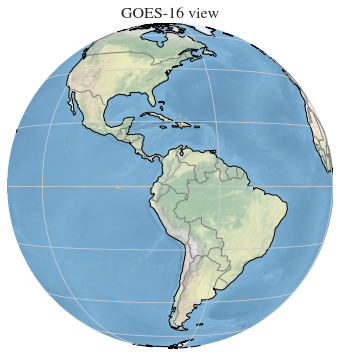

In [12]:
crs2 = area_def_fulldisk.to_cartopy_crs()
fig, ax1 = plt.subplots(figsize=(6,6), subplot_kw={'projection': crs2})

ax1.gridlines()
ax1.coastlines()
ax1.stock_img()
ax1.add_feature(cartopy.feature.BORDERS, color='gray', zorder=5)

ax1.axis("off")
ax1.set_title("GOES-16 view", horizontalalignment = 'center')
#plt.savefig('../plots/thesis/goes_only_cartopy.png', bbox_inches='tight')

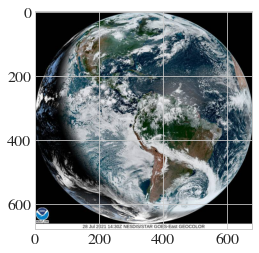

In [13]:
geocolorim = plt.imread("../plots/thesis/20212091430_GOES16-ABI-FD-GEOCOLOR-678x678.jpg")
plt.imshow(geocolorim)

/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')
/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')
/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


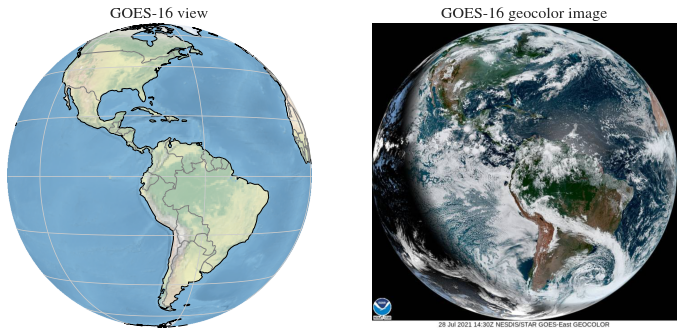

In [29]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])

crs2 = area_def_fulldisk.to_cartopy_crs()
ax1 = fig.add_subplot(gs[0], projection=crs2)
ax1.gridlines()
ax1.coastlines()
ax1.stock_img()
ax1.add_feature(cartopy.feature.BORDERS, color='gray', zorder=5)
ax1.axis("off")
ax1.set_title("GOES-16 view", horizontalalignment = 'center')

ax2 = fig.add_subplot(gs[1])#, projection=ccrs.PlateCarree())
ax2.imshow(geocolorim)
ax2.axis("off")
ax2.set_title("GOES-16 geocolor image", horizontalalignment = 'center')
plt.savefig('../plots/thesis/goes_geocolor_cartopy.pdf', bbox_inches='tight', dpi=400)